Task 2 :- Stock Market Prediction And Forecasting Using Stacked LSTM
Dataset Link - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math


In [2]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

# Displaying the first few rows of the dataset
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
# Sorting data by date
df = df.sort_index(ascending=True, axis=0)

# Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Converting the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of the data)
training_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Spliting the data into training and testing sets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]


In [4]:
# Creating the training dataset
x_train, y_train = [], []

# Populate x_train and y_train with sequences of 60 data points
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Converting the training data to numpy arrays for LSTM input
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for the LSTM model (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Preparing the test dataset in a similar way
x_test, y_test = [], dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Converting test data to numpy arrays
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [5]:
# Building a LSTM model
model = Sequential()

# Adding the first LSTM layer with 50 neurons and return sequences to stack another LSTM
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Adding another LSTM layer
model.add(LSTM(50, return_sequences=False))

# Adding a dense layer with 25 neurons
model.add(Dense(25))

# Adding a final dense layer with 1 neuron (for the output)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1568/1568 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.0040


In [6]:
# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Reverse the scaling

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"RMSE: {rmse}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
RMSE: 2.1363071151096054


C:\Users\Admin\AppData\Local\Temp\ipykernel_9416\2996135171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


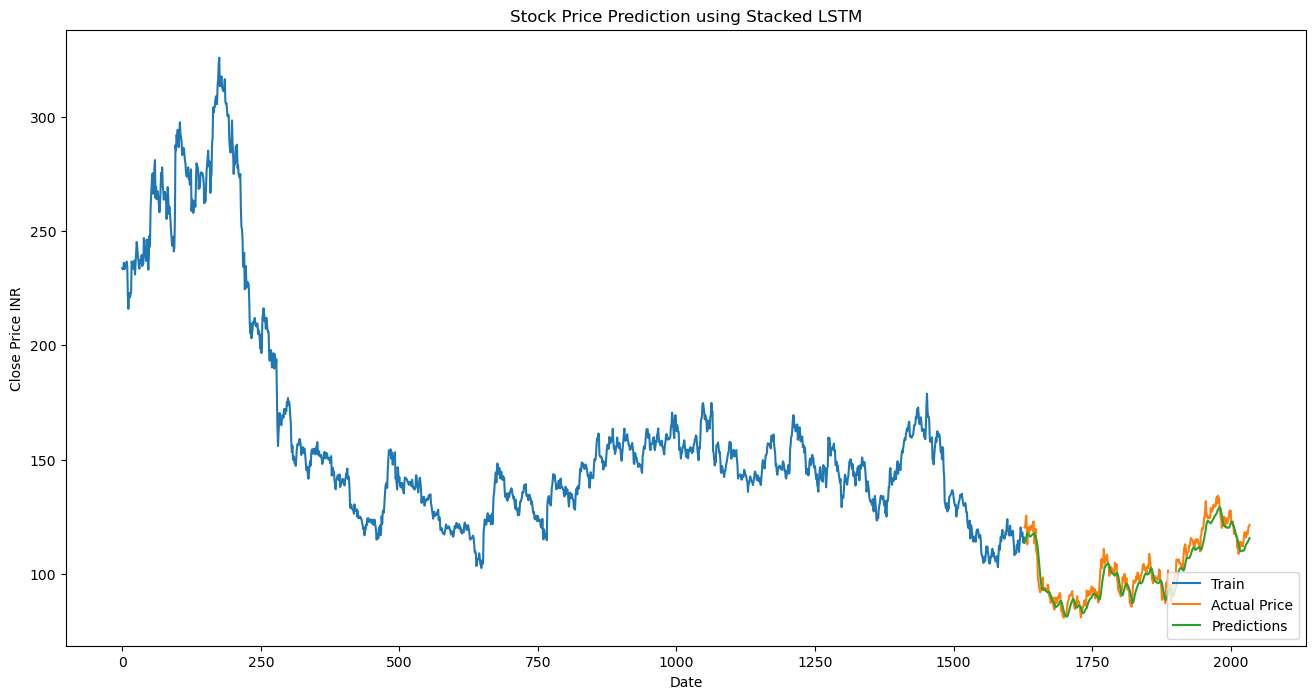

In [7]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using Stacked LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Price', 'Predictions'], loc='lower right')
plt.show()


In [8]:
# Predict the next day's price
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(f"Predicted Price for next day: {predicted_price}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Price for next day: [[116.4595]]
